# Biodiversity in U.S. National Parks
&nbsp;
# North American Birds of Prey

<img src="Images/Bald Eagle.jpg"/>
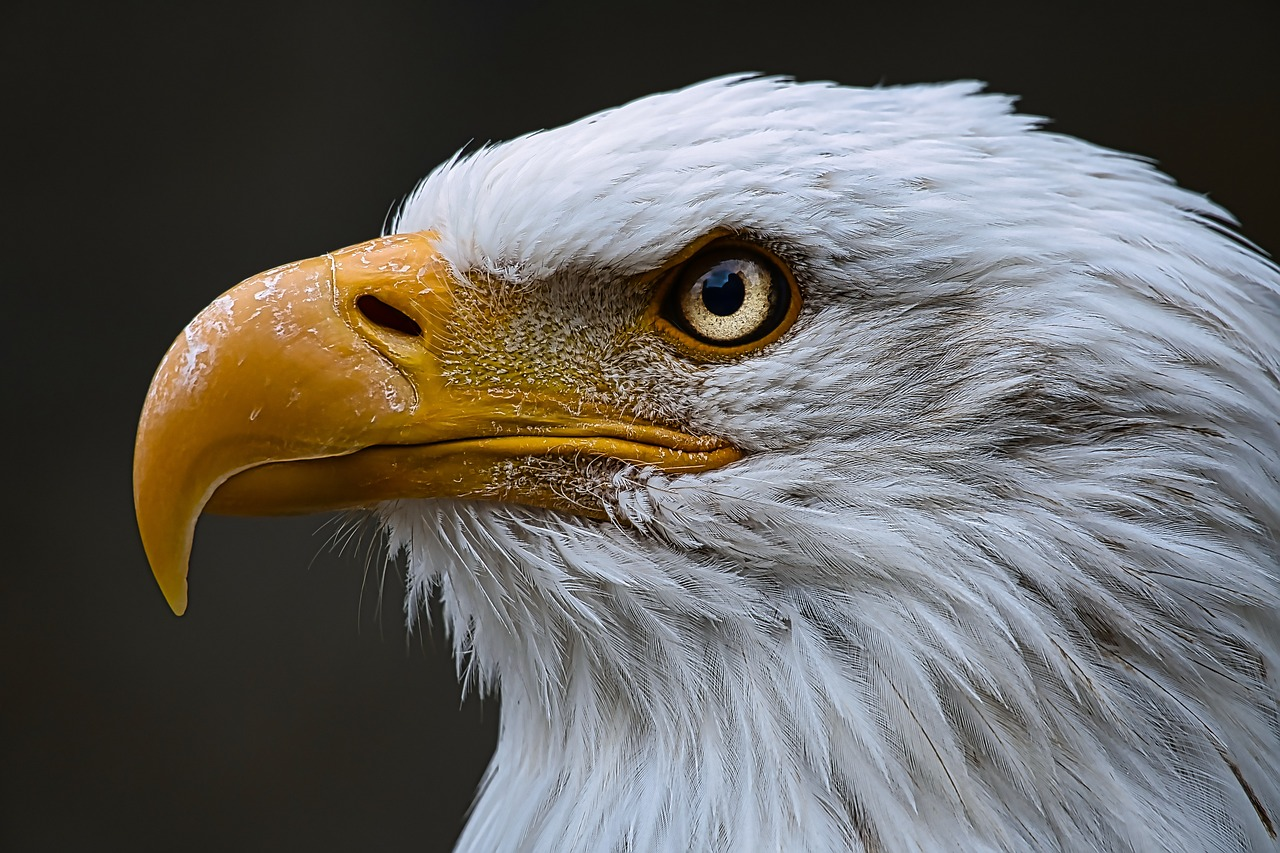

#### The [Bald Eagle](https://pixabay.com/photos/bald-eagle-bird-raptor-bird-of-prey-6481346/) is an enduring symbol. It is the national bird of the United States of America, appearing on both the [Great Seal](https://en.wikipedia.org/wiki/Great_Seal_of_the_United_States) and the one dollar bill.

#### It was once a critically endangered species.

Importing the necessary modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Loading in the data

There are two .csv files to inspect

----

## Observations

The `observations.csv` contains data about different species and their conservation status

- `scientific_name` - the scientific name of each species
- `park_name` - National Park where species were found
- `observations` - the number of times each species was observed at park in the past 7 days


In [3]:
obs_data = pd.read_csv("observations.csv")
print(f"Columns: {obs_data.columns.tolist()}\n")

Columns: ['scientific_name', 'park_name', 'observations']



In [4]:
print(f"The first few entries in the Dataframe:\n\n{obs_data.head()}\n")
print(f"(Rows, Columns): {obs_data.shape}\n")

The first few entries in the Dataframe:

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85

(Rows, Columns): (23296, 3)



In [5]:
sci_name = obs_data.scientific_name.unique()
sci_name_list = sci_name.tolist()

print(f"We have {len(sci_name_list)} unique species")

We have 5541 unique species


<img src="Images/National Park Map.png"/>

### From [Google Earth](https://earth.google.com/web/@39.00737915,-95.31864374,-81.61621475a,5326276.02988026d,35y,0h,0t,0r) we have the following National Parks all situated in the continental United States;

- #### Bryce Canyon in Utah
- #### Great Smoky Mountains in North Carolina & Tennessee
- #### Yellowstone in Idaho, Montana & Wyoming
- #### Yosemite in California

### An extremely diverse landscape is represented

<img src="Images/Park Landscapes.jpg"/>

[Pixabay](https://pixabay.com)

#### From top left circling anticlockwise, we have;

[Yosemite](https://www.nps.gov/yose/index.htm),
[Bryce Canyon](https://www.nps.gov/brca/index.htm),
[Great Smoky Mountains](https://www.nps.gov/grsm/index.htm),
[Yellowstone](https://www.nps.gov/yell/index.htm)

I will assume `Bryce National Park` refers to 'Bryce Canyon', UT

In [6]:
obs_data['park_name'].replace({'Great Smoky Mountains National Park':'Great Smoky Mountains',
                                                  'Bryce National Park':'Bryce Canyon',
                                                  'Yosemite National Park':'Yosemite',
                                                  'Yellowstone National Park':'Yellowstone',
                                                  },inplace=True)
parks_list = obs_data.park_name.unique().tolist()
print(f"National Parks: \n{parks_list}\n")

National Parks: 
['Great Smoky Mountains', 'Yosemite', 'Bryce Canyon', 'Yellowstone']



----
&nbsp;
### Distribution of observation data

In [7]:
print(f"Observation statistics: \n\n{obs_data.observations.describe()}\n")

Observation statistics: 

count    23296.000000
mean       142.287904
std         69.890532
min          9.000000
25%         86.000000
50%        124.000000
75%        195.000000
max        321.000000
Name: observations, dtype: float64



In [8]:
obs_data.park_name.value_counts()

Great Smoky Mountains    5824
Yosemite                 5824
Bryce Canyon             5824
Yellowstone              5824
Name: park_name, dtype: int64

### The observations are evenly spread between the National Parks

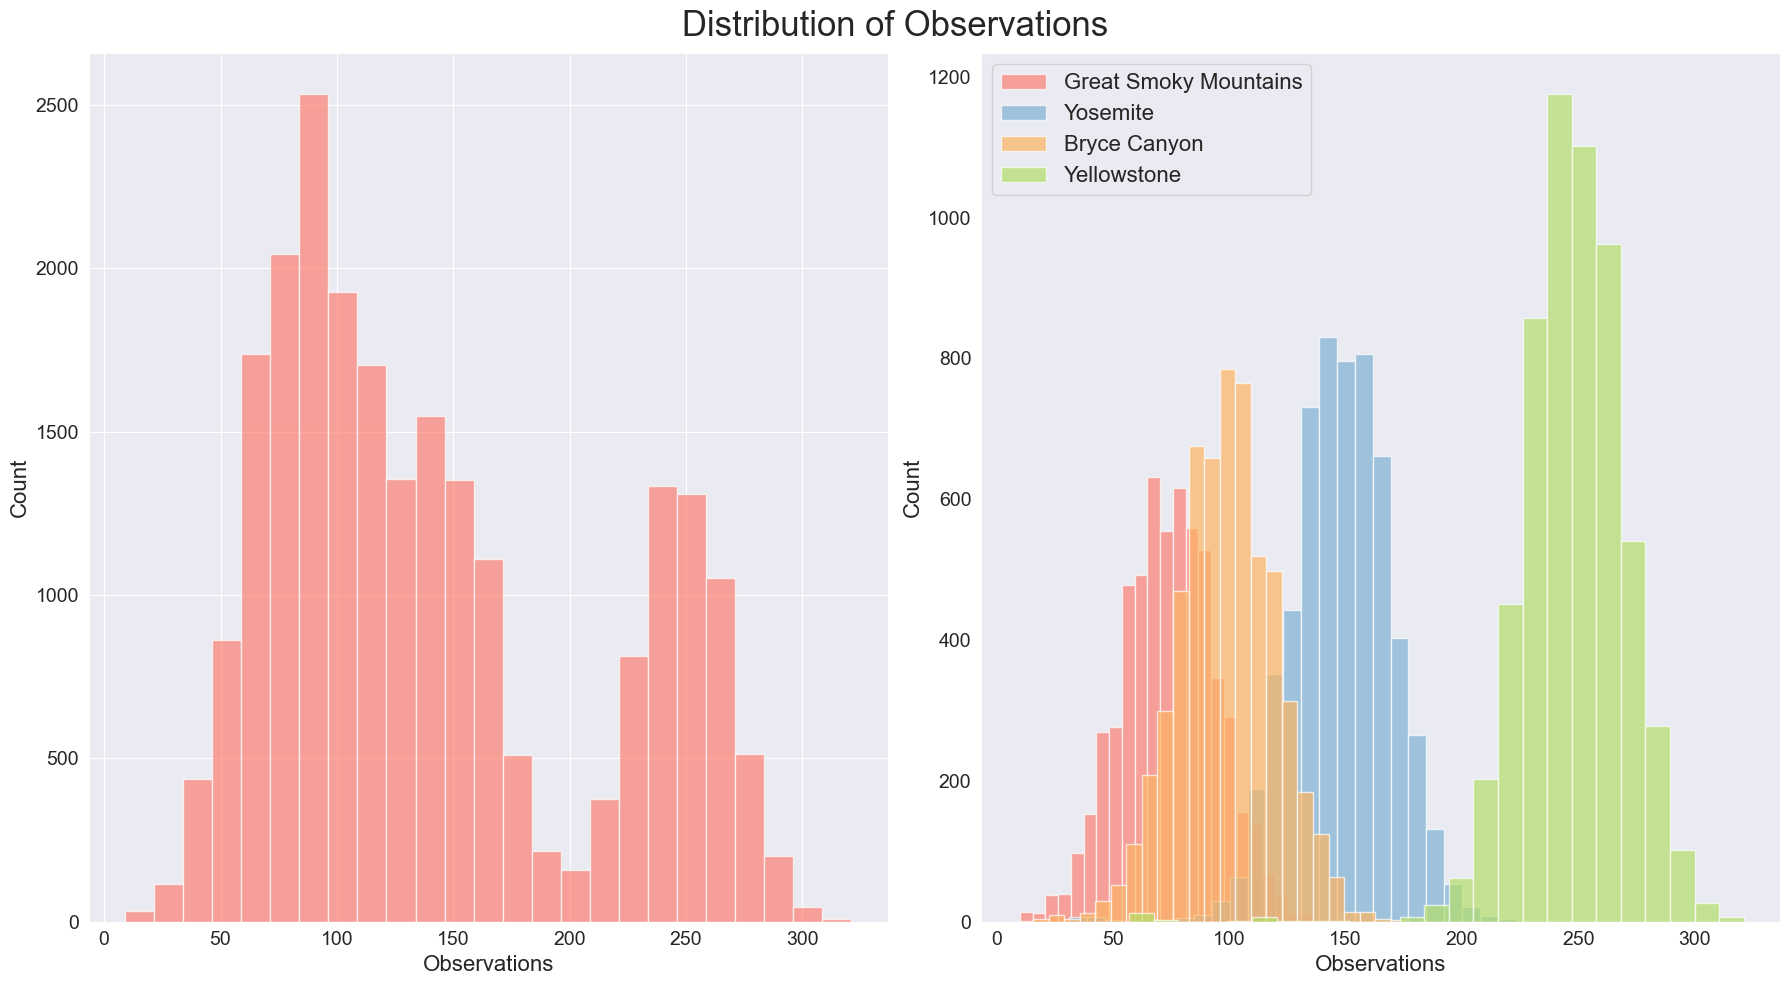

In [9]:
colours = ['#fb8072','#80b1d3','#fdb462','#b3de69']
plt.figure(figsize = (18,10))

plt.subplot(1,2,1)
plt.hist(x = obs_data.observations,
         bins = 25, color=colours[0], alpha=0.7)
plt.xlabel('Observations', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Count', fontsize = 16)
plt.yticks(fontsize = 14)

plt.subplot(1,2,2)
for i, park in enumerate(parks_list):
    hist_df = obs_data[obs_data.park_name == park]
    plt.hist(x = hist_df.observations,
            bins = 25, label = park, alpha=0.7, color=colours[i])
plt.xlabel('Observations', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Count', fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 16)
plt.grid(False)

plt.suptitle("Distribution of Observations", fontsize = 25)
plt.tight_layout()
plt.show()


### By inspection, when divided by National Park, observations appear normally distributed. We will not explore the distribution of observations any further.


We have saved the list variables;

`parks_list`
which is a list of the National parks.
There are four, all in the United States of America

`num_species_list`
which is a list of unique species.

In [10]:
print(f"Total number of observations: {obs_data.observations.sum()}")

Total number of observations: 3314739


----

### That's quite a few sightings in the last seven days!

----

## Species

The `species_info.csv` contains information on the different species in the National Parks along with their conservation status.

- `category` - class of animal
- `scientific_name` - the scientific name of each species
- `common_name` - the common names of each species
- `conservation_status` - each species’ current conservation status


In [11]:
species_data = pd.read_csv("species_info.csv")
print(f"Columns: {species_data.columns.tolist()}")

Columns: ['category', 'scientific_name', 'common_names', 'conservation_status']


In [12]:
print(species_data.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


#### We need to see if the number of unique values correlates with the other dataframe
#### We need how many `conservation_status` we have 'NaN' which I'll assume means 'not endangered'

In [13]:
print(f"Shape of the data (Rows, Columns): {species_data.shape}\n")
print(f"Type of data:\n\n{species_data.dtypes}\n")
print(f"The number of unique values:\n\n{species_data.nunique()}")

Shape of the data (Rows, Columns): (5824, 4)

Type of data:

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

The number of unique values:

category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64


In [14]:
sci_name_list_2 = species_data.scientific_name.unique()
print(f"Unique Species (Scientific Name): {len(sci_name_list_2)}\n")

com_name_list = species_data.common_names.unique()
print(f"Unique Species (Common Name): {len(com_name_list)}")

Unique Species (Scientific Name): 5541

Unique Species (Common Name): 5504


I would expect the scientific name/common name to be the same length. There's a discrepancy.
Maybe some species $\notin$ `common_names`!

----
## Exploring the `category` column

In [15]:
category_list = species_data.category.unique()
print(f"{len(category_list)} Categories:\n\n{category_list}\n")
species_data.groupby('category').size()

7 Categories:

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']



category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

----
## Exploring the `conservation_status` column

In [16]:
print(f"There are {species_data.conservation_status.nunique()} categories:\n\n{species_data.conservation_status.unique()}")

There are 4 categories:

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [17]:
print(f"NaN value count: {species_data.conservation_status.isna().sum()}\n")
print(species_data.groupby("conservation_status").size())

NaN value count: 5633

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


----

# Analysis



The column `conservation_status` has values;
&nbsp;
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range
&nbsp;
I will change the `NaN` value to 'Least Concern' as per the [International Union for Conservation of Nature](https://en.wikipedia.org/wiki/IUCN_Red_List) classification system

In [18]:
species_data.fillna('Least Concern', inplace=True)
species_data.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
Least Concern         5633
Species of Concern     161
Threatened              10
dtype: int64

In [19]:
conservation_cat = species_data[species_data.conservation_status != 'Least Concern']\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()
print(f"Categories nested in conservation_status' column:\n\n{conservation_cat}")

Categories nested in conservation_status' column:

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


Birds have the greatest number of 'Species of Concern'

In [20]:
cons_status_list = ['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']
print(cons_status_list)

['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']


----
## We will now visualise the distribution of `conservation_status` across `category`

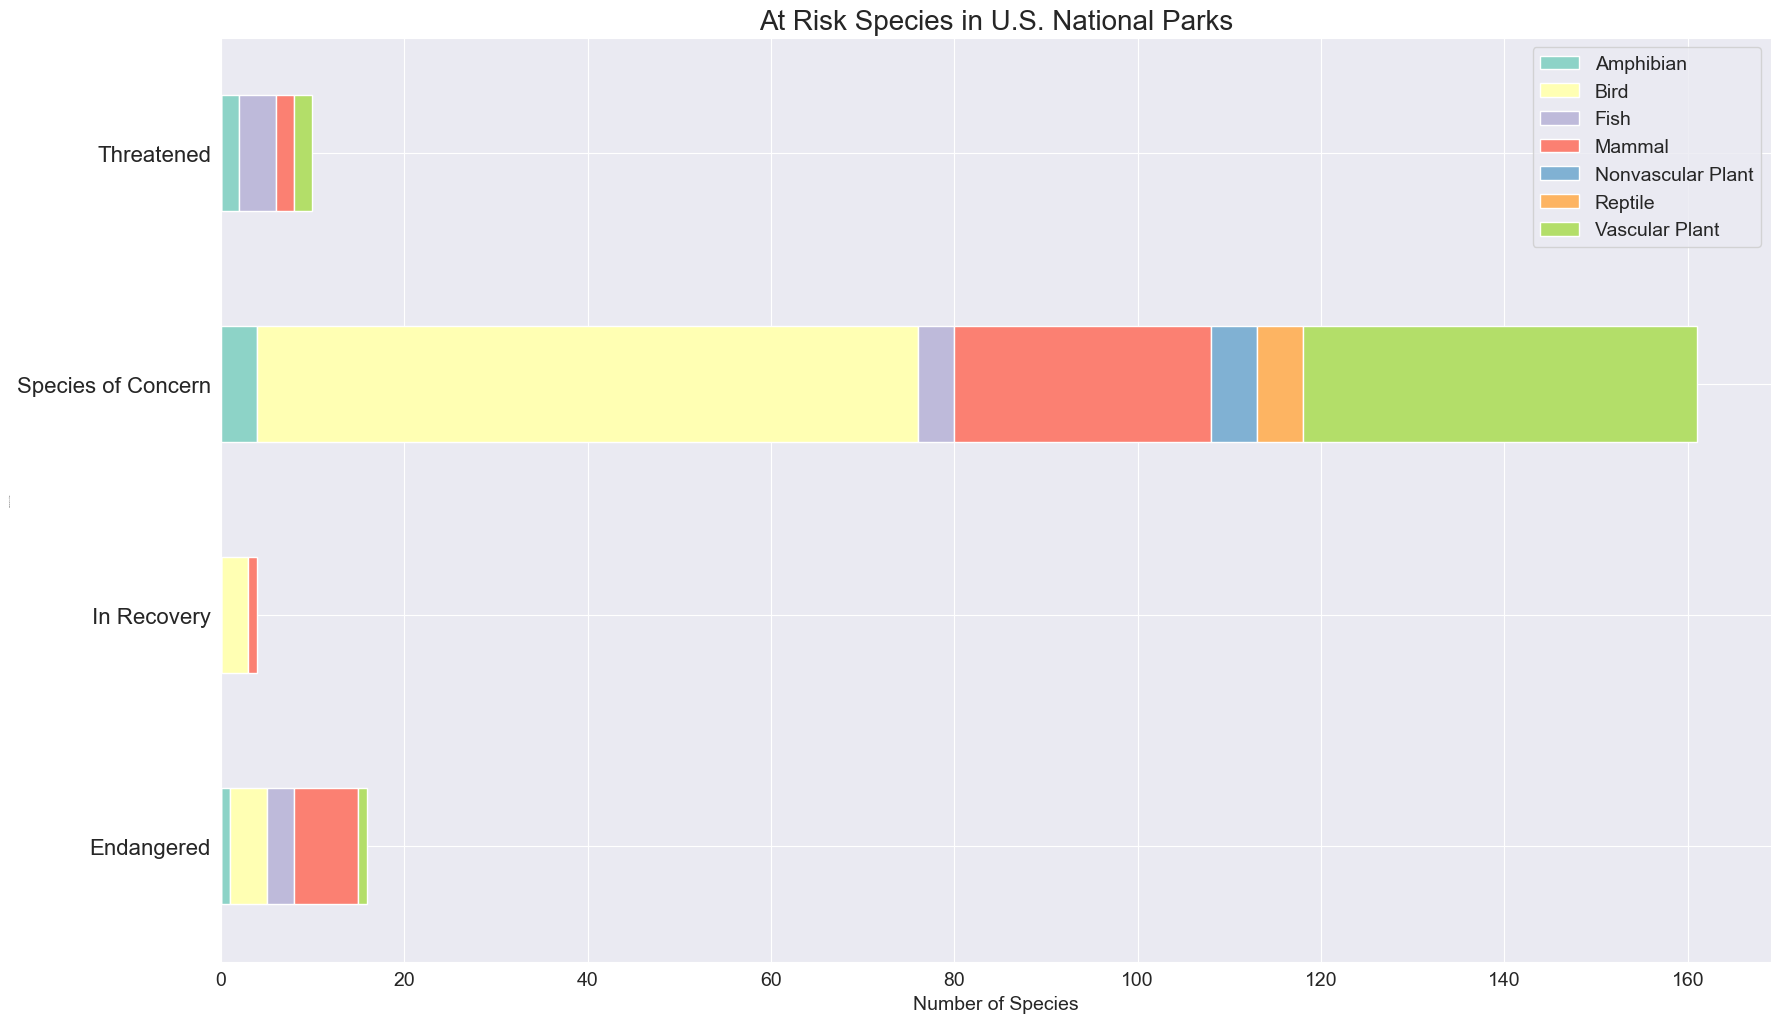

<Figure size 640x480 with 0 Axes>

In [21]:
colours = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd']
ax = conservation_cat.plot(kind='barh', figsize=(20,12),
                           stacked=True, color=colours)
ax.set_ylabel("Conservation Status", fontsize=0)
ax.set_xlabel("Number of Species", fontsize=14)
ax.set_yticks(range(len(cons_status_list)), fontsize=16)
ax.set_yticklabels(cons_status_list, fontsize=16)
plt.xticks(fontsize=14)
plt.title("At Risk Species in U.S. National Parks", fontsize=20)
plt.legend(fontsize=14)
plt.show()
plt.clf()

### Removing the 'Species of Concern' category

In [22]:
conservation_cat_two = species_data[(species_data.conservation_status != 'Least Concern')
                    & (species_data.conservation_status != 'Species of Concern')]\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()
cons_status_list_two = ['Endangered', 'In Recovery', 'Threatened']

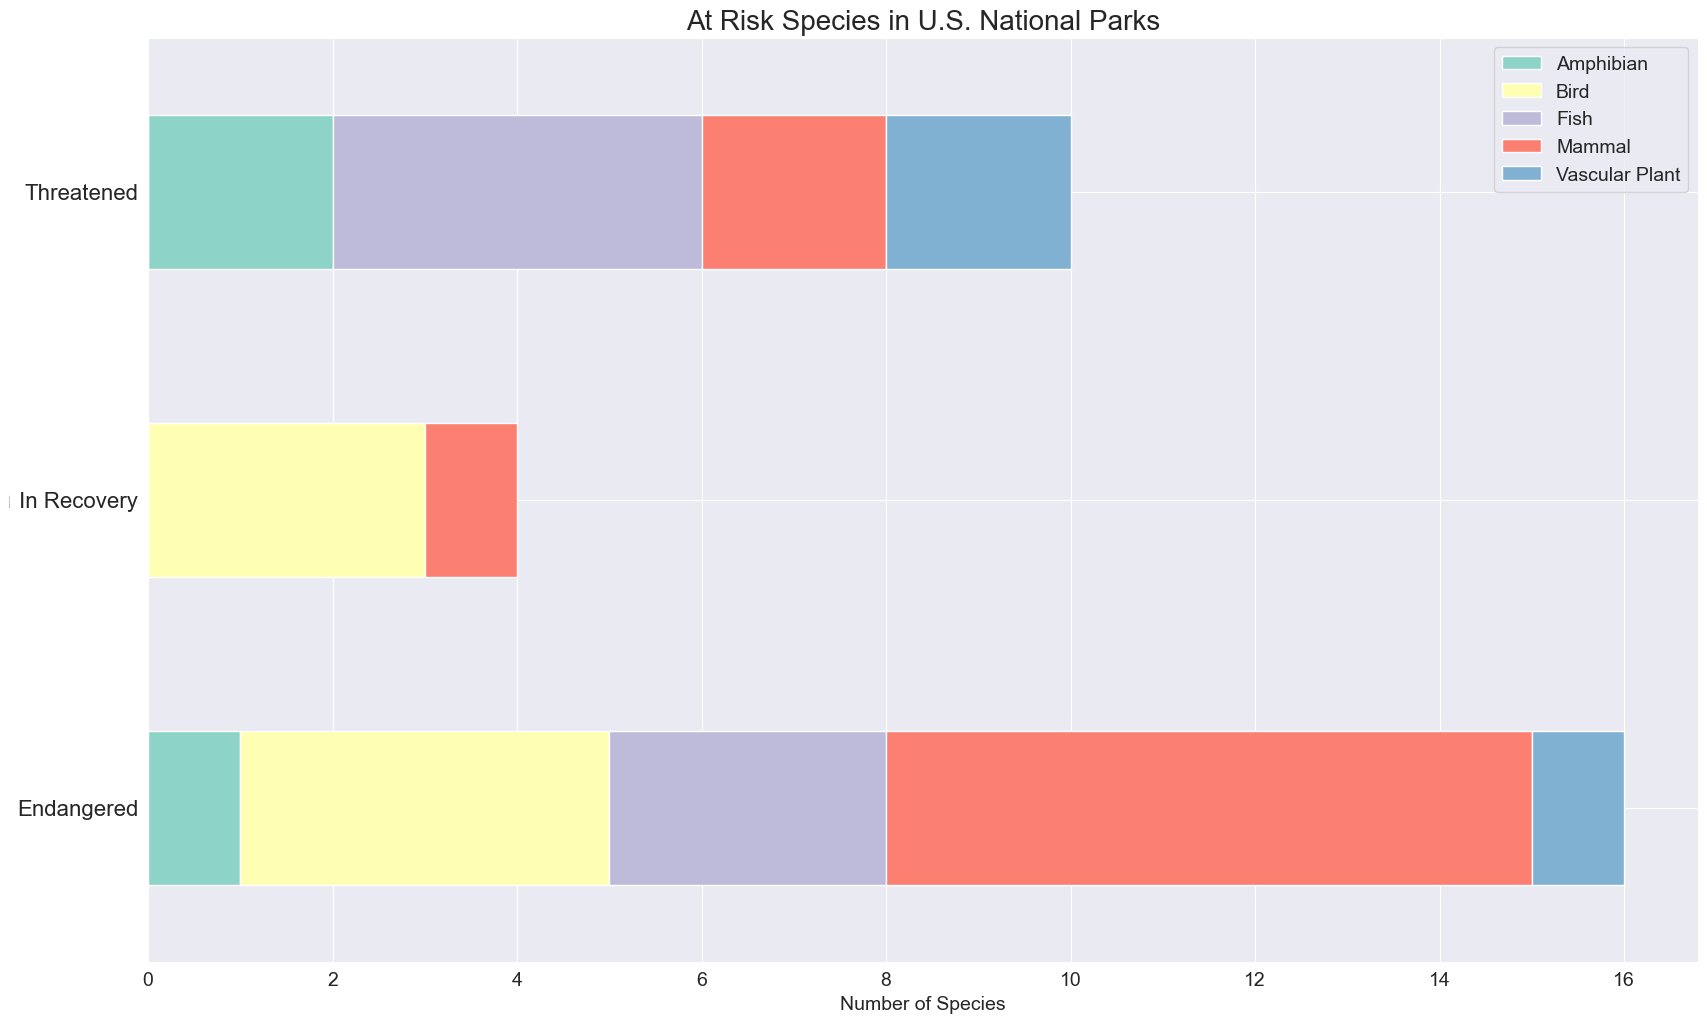

<Figure size 640x480 with 0 Axes>

In [23]:
ax = conservation_cat_two.plot(kind='barh', figsize=(20,12),
                           stacked=True, color=colours)
ax.set_ylabel("Conservation status", fontsize=0)
ax.set_xlabel("Number of Species", fontsize=14)
ax.set_yticks(range(len(cons_status_list_two)))
ax.set_yticklabels(cons_status_list_two, fontsize=16)
plt.xticks(fontsize=14)
plt.title("At Risk Species in U.S. National Parks", fontsize=20)
plt.legend(fontsize=14)
plt.show()
plt.clf()

### From the above graphs, it seems that `Birds` are most at risk across the board in U.S. National Parks.

#### Is this true?

### Are certain `categories` of species more likely to be endangered?

We will create a new column, `is_protected` to include any species with a value other than `Least Concern`.

In [24]:
species_data['is_protected'] = species_data.conservation_status != 'Least Concern'

In [25]:
category_counts = species_data.groupby(['category', 'is_protected'])\
                            .scientific_name.nunique()\
                            .reset_index()\
                            .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                            .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Now we add a column, `percent_protected` that shows the rate of protected species

In [26]:
percentage = round(category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100, 2)

category_counts['percent_protected'] = percentage
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


## Mammals have the greatest proportion of protected species

----

# Species Exploration

## I'm most interested in exploring what I'd consider to be apex predators. They are normally one of the best indicators of biodiversity
----

### Wolves

We first explore the genus [Canis](https://en.wikipedia.org/wiki/Canis) which includes;
wolves, dogs, coyotes and jackals.

In [27]:
species_data['is_canis'] = species_data.scientific_name.str.contains(r"\bCanis\b", regex=True)
species_data[species_data.is_canis]

,category,scientific_name,common_names,conservation_status,is_protected,is_canis
7,Mammal,Canis latrans,Coyote,Species of Concern,True,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True,True
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery,True,True
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,True,True


They are all protected.

However, there are not many species represented coupled with an element of ambiguity. Some `common_names` take multiple values.
For example, `Gray Wolf` is represented three times with two different conservation status'

----

### Big Cats

Next we explore any hits under `common_name` 'cat' or 'lion'

In [28]:
species_data['cat'] = species_data.common_names.str.contains(r"\bCat\b", regex=True)
species_data[species_data.cat]

,category,scientific_name,common_names,conservation_status,is_protected,is_canis,cat
14,Mammal,Felis silvestris,"Wild Cat, Wildcat",Least Concern,False,False,True
858,Vascular Plant,Hypochaeris radicata,"Cat's Ear, Spotted Cat's-Ear",Least Concern,False,False,True
3577,Vascular Plant,Cryptantha torreyana,"Torrey's Cat's-Eye, Torrey's Cryptantha",Least Concern,False,False,True
4062,Vascular Plant,Picea glauca,"Black Hills Spruce, Canadian Spruce, Cat Spruc...",Least Concern,False,False,True
4798,Vascular Plant,Hypochaeris glabra,"Smooth Cat's Ear, Smooth Catsear",Least Concern,False,False,True
4799,Vascular Plant,Hypochaeris radicata,"Common Cat's-Ear, False Dandelion, Frogbit, Go...",Least Concern,False,False,True


We found one cat and five plants.

In [29]:
species_data['lion'] = species_data.common_names.str.contains(r"\bLion\b", regex=True)
species_data[species_data.lion]

,category,scientific_name,common_names,conservation_status,is_protected,is_canis,cat,lion
13,Mammal,Felis concolor,Mountain Lion,Least Concern,False,False,False,True
16,Mammal,Puma concolor,Panther (Mountain Lion),Least Concern,False,False,False,True
897,Vascular Plant,Prenanthes serpentaria,"Lion's-Foot, Rattlesnakeroot",Least Concern,False,False,False,True
898,Vascular Plant,Prenanthes trifoliolata,"Lion's Foot, Three-Leaved Rattlesnake-Root",Least Concern,False,False,False,True
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",Least Concern,False,False,False,True
4451,Mammal,Puma concolor,Mountain Lion,Least Concern,False,False,False,True


#### There's even more ambiguity searching for `lion`
`Puma concolor` has been referred to as "Panther, Cougar, Mountain Lion, Puma"
`Felis concolor` has also been referred to as a "Mountain Lion"

We will search for more hits under the genus [Felis](https://en.wikipedia.org/wiki/Felis)

In [30]:
species_data['is_felis'] = species_data.scientific_name.str.contains(r"\bFelis\b", regex=True)
species_data[species_data.is_felis]

,category,scientific_name,common_names,conservation_status,is_protected,is_canis,cat,lion,is_felis
13,Mammal,Felis concolor,Mountain Lion,Least Concern,False,False,False,True,True
14,Mammal,Felis silvestris,"Wild Cat, Wildcat",Least Concern,False,False,True,False,True


----
# Milestone

This part of the dataset will be reevaluated once an efficient sorting algorithm has been written.

----

We remove the newly created columns to 'clean' `species_data`

In [31]:
species_data.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_canis,cat,lion,is_felis
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,False,False,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",Least Concern,False,False,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern,False,False,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern,False,False,False,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern,False,False,False,False,False


In [32]:
species_data.drop(columns=['is_canis', 'lion', 'cat', 'is_felis'], axis=1, inplace=True)
species_data.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,False
1,Mammal,Bos bison,"American Bison, Bison",Least Concern,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern,False


----

# Birds of Prey
&nbsp;
### We define birds of prey/predatory birds as [Raptors](https://www.blm.gov/sites/default/files/documents/files/Morley-Nelson-Snake-River-Birds-Of-Prey_More-About-Raptors.pdf), which is derived from the Latin *rapere* which means to 'seize or take by force'.
They are typically, in possession of;
&nbsp;
- Hooked beaks
- Sharp Talons
- Keen eyesight
- A hypercarnivous diet
&nbsp;
## We shall first analyse protected bird species.
### That is, $\neq$ `Least Concern`


In [33]:
protected_birds = (species_data[(species_data.category == 'Bird')
                                & (species_data.conservation_status != 'Least Concern')])
print(protected_birds.head())
print(f"\nThere are {len(protected_birds)} protected bird species in 'observations.csv'")

   category     scientific_name         common_names conservation_status  \
91     Bird  Accipiter cooperii        Cooper's Hawk  Species of Concern   
93     Bird  Accipiter striatus   Sharp-Shinned Hawk  Species of Concern   
94     Bird   Aquila chrysaetos         Golden Eagle  Species of Concern   
96     Bird      Buteo lineatus  Red-Shouldered Hawk  Species of Concern   
98     Bird      Circus cyaneus     Northern Harrier  Species of Concern   

    is_protected  
91          True  
93          True  
94          True  
96          True  
98          True  

There are 79 protected bird species in 'observations.csv'


## There are 4 `Endangered` bird species

- Whooping Crane
- Bachman's Wood Warbler
- Rock-Cockaded Woodpecker
- California Condor

In [34]:
endangered_birds = protected_birds.loc[protected_birds['conservation_status'] == 'Endangered']
print(endangered_birds)

     category          scientific_name  \
173      Bird           Grus americana   
276      Bird      Vermivora bachmanii   
343      Bird        Picoides borealis   
4505     Bird  Gymnogyps californianus   

                                   common_names conservation_status  \
173                              Whooping Crane          Endangered   
276   Bachman's Warbler, Bachman's Wood Warbler          Endangered   
343                     Red-Cockaded Woodpecker          Endangered   
4505                          California Condor          Endangered   

      is_protected  
173           True  
276           True  
343           True  
4505          True  


## We shall now isolate birds of prey.

### Research is required to create a list of the common names of North American birds of prey. For example, [Eagle, Hawk, etc...](https://en.wikipedia.org/wiki/Bird_of_prey)

#### *Caveat emptor* ; We may miss entries with this method if the list is not exhaustive.

In [35]:
birds_of_prey = ["Eagle", "Hawk", "Falcon", "Buzzard", "Harrier", "Kite", "Owl", "Osprey", "Vulture", "Condor"]

### We analyse `species_data` to see if any `common_names` correlate with the above list

- Create a new column `bird_of_prey` in the DataFrame `species_data`
- Search `common_names` for any matches to the above list `birds_of_prey`
- This adds a value to the `bird_of_prey` column
- The value is a list either empty [] or in the form [`value`, `value`]
- The next line replaces the [`value`] with a string followed by a full-stop if more than one [`value`].


In [36]:
species_data['bird_of_prey'] = species_data.common_names.str.findall('(?i)({0})'.format('|'.join(birds_of_prey)))
# converts the list in 'bird_of_prey' to a string
species_data['bird_of_prey'] = species_data['bird_of_prey'].apply('. '.join)


### We then separate `protected_birds` into another DataFrame `protected_birds_prey` based on whether the `bird_of_prey` column contains an empty string

In [37]:
protected_birds = (species_data[(species_data.category == 'Bird')
                                & (species_data.conservation_status != 'Least Concern')])
protected_birds_prey = protected_birds[protected_birds['bird_of_prey'].map(lambda x: len(x)) > 0]
protected_birds_prey_list = protected_birds_prey.common_names.tolist()
print(f"We have {len(protected_birds_prey_list)} protected birds of prey\
                \n\nWith Common Names:\n\n{protected_birds_prey_list}")
print(protected_birds_prey.shape)

We have 18 protected birds of prey                

With Common Names:

["Cooper's Hawk", 'Sharp-Shinned Hawk', 'Golden Eagle', 'Red-Shouldered Hawk', 'Northern Harrier', 'American Swallow-Tailed Kite, Swallow-Tailed Kite', 'Bald Eagle', 'Turkey Vulture', 'Osprey', 'Peregrine Falcon', 'Short-Eared Owl', 'Long-Eared Owl', 'Rough-Legged Hawk', 'Osprey, Western Osprey', 'Prairie Falcon', 'American Peregrine Falcon', 'White-Tailed Kite', 'California Condor']
(18, 6)




----
# Dataframe Merge

`protected_birds` will be merged with `obs_data` to create a Dataframe `protected_birds_obs` with observations of protected birds across the four national parks

Which after inspection;

- Need to delete repeated entries `[Osprey, Western Osprey]`
- Need to replace `'American Swallow-Tailed Kite, Swallow-Tailed Kite` with `Swallow-Tailed Kite` in the `common_names` column
- Need to replace `Kite. Kite` with `Kite` in the `bird_of_prey` column

----

## Create Dataframe `protected_birds_obs` containing all protected birds

In [38]:
protected_birds_obs = obs_data.merge(protected_birds[protected_birds.is_protected])

In [39]:
osprey_obs = (protected_birds_obs[(protected_birds_obs.common_names == 'Osprey')
             | (protected_birds_obs.common_names == 'Osprey, Western Osprey')])
print(osprey_obs[4:11])

      scientific_name     park_name  observations category  \
8   Pandion haliaetus  Bryce Canyon            72     Bird   
9   Pandion haliaetus  Bryce Canyon            72     Bird   
10  Pandion haliaetus   Yellowstone           223     Bird   
11  Pandion haliaetus   Yellowstone           223     Bird   
12  Pandion haliaetus      Yosemite           148     Bird   
13  Pandion haliaetus      Yosemite           148     Bird   
14  Pandion haliaetus   Yellowstone           243     Bird   

              common_names conservation_status  is_protected    bird_of_prey  
8                   Osprey  Species of Concern          True          Osprey  
9   Osprey, Western Osprey  Species of Concern          True  Osprey. Osprey  
10                  Osprey  Species of Concern          True          Osprey  
11  Osprey, Western Osprey  Species of Concern          True  Osprey. Osprey  
12                  Osprey  Species of Concern          True          Osprey  
13  Osprey, Western Osprey  S

We can see that `Osprey` and `Osprey, Western Osprey` observation values are exactly repeated

- we also have two different Osprey `observation`s for each National Park

In [40]:
print(f"We have {osprey_obs.shape[0]} rows and should expect {int(osprey_obs.shape[0] / 2)}")

We have 16 rows and should expect 8


After deletion we should be left with 4. Nevertheless;

- Delete repeated entries [Osprey, Western Osprey]
- Replace `'American Swallow-Tailed Kite, Swallow-Tailed Kite` with `Swallow-Tailed Kite` in the `common_names` column
- Replace `Kite. Kite` with `Kite` in the `bird_of_prey` column

In [41]:
protected_birds_obs.drop(protected_birds_obs.loc[protected_birds_obs['common_names']=='Osprey, Western Osprey'].index, inplace=True)
protected_birds_obs['common_names'].replace({'American Swallow-Tailed Kite, Swallow-Tailed Kite':'Swallow-Tailed Kite'},inplace=True)
protected_birds_obs['bird_of_prey'].replace({'Kite. Kite':'Kite'},inplace=True)

----


### Create separate Dataframe `protected_birds_prey_obs` containing only birds of prey

Again using a lambda function

In [42]:
protected_birds_prey_obs = protected_birds_obs[protected_birds_obs['bird_of_prey'].map(lambda x: len(x)) > 0]

----
&nbsp;
## Total number of protected bird observations across the four National Parks

In [43]:
protected_birds_obs['is_bird_of_prey'] = protected_birds_obs.bird_of_prey != ''

In [44]:
bird_obs_by_park = protected_birds_obs.groupby(['park_name', 'is_bird_of_prey']).observations.sum().reset_index()
print(bird_obs_by_park)

               park_name  is_bird_of_prey  observations
0           Bryce Canyon            False          5982
1           Bryce Canyon             True          1472
2  Great Smoky Mountains            False          4157
3  Great Smoky Mountains             True          1002
4            Yellowstone            False         14282
5            Yellowstone             True          3778
6               Yosemite            False          8785
7               Yosemite             True          2226


## Visualisation of proportion of bird of prey observations across the four National Parks

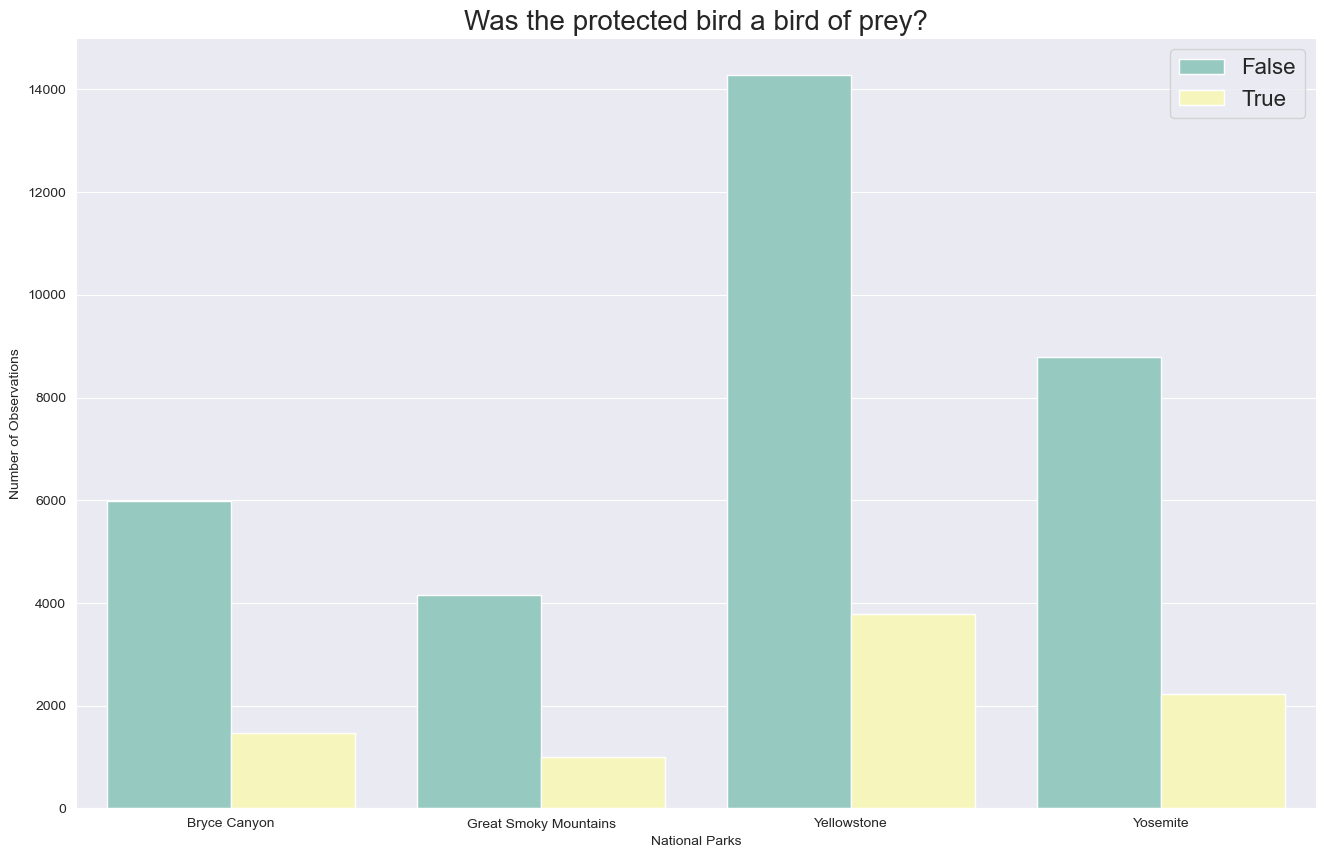

In [45]:
plt.figure(figsize=(16, 10))
data = bird_obs_by_park
sns.barplot(x=data.park_name, y=data.observations , hue=data.is_bird_of_prey, palette='Set3')
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Was the protected bird a bird of prey?',  fontsize=20)
plt.legend(fontsize=16)
plt.show()

### From the above visual, bird of prey sightings make up approximately a quarter of all protected bird sightings across the National Parks

----

### Create some visualisations of species of bird of prey by recorded National Park observation

which have already been seperated into a new Dataframe; `protected_birds_prey_obs`

In [46]:
#pro_prey_obs = protected_birds_prey_obs.drop(columns=['category', 'is_protected'], axis=1, inplace=True)
print(protected_birds_prey_obs.head())
print(protected_birds_prey_obs.shape)

      scientific_name              park_name  observations category  \
0  Accipiter cooperii           Bryce Canyon            95     Bird   
1  Accipiter cooperii               Yosemite           138     Bird   
2  Accipiter cooperii            Yellowstone           245     Bird   
3  Accipiter cooperii  Great Smoky Mountains            65     Bird   
4   Pandion haliaetus               Yosemite           134     Bird   

    common_names conservation_status  is_protected bird_of_prey  
0  Cooper's Hawk  Species of Concern          True         Hawk  
1  Cooper's Hawk  Species of Concern          True         Hawk  
2  Cooper's Hawk  Species of Concern          True         Hawk  
3  Cooper's Hawk  Species of Concern          True         Hawk  
4         Osprey  Species of Concern          True       Osprey  
(72, 8)


----
### Next is to assign a unique colour to each 'type' of `bird of prey` variable

In [47]:
sorted_birds_of_prey = sorted(birds_of_prey)
print(f"We have {len(sorted_birds_of_prey)} birds of prey {sorted_birds_of_prey}")

We have 10 birds of prey ['Buzzard', 'Condor', 'Eagle', 'Falcon', 'Harrier', 'Hawk', 'Kite', 'Osprey', 'Owl', 'Vulture']


In [48]:
bird_of_prey_colours = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#bc80bd','#d9d9d9']

The above list was compiled from the html codes from the qualitative colour palette 'Set-3' from [Color Brewer](https://colorbrewer2.org/#type=qualitative&scheme=Set3&n=10)

Now to create a {key: value} dictionary of these colours.

In [49]:
prey_colour = {}
for bird in sorted_birds_of_prey:
    for colour in bird_of_prey_colours:
        prey_colour[bird] = colour
        bird_of_prey_colours.remove(colour)
        break

print(f"The resulting dictionary is: \n{prey_colour}")

The resulting dictionary is: 
{'Buzzard': '#8dd3c7', 'Condor': '#ffffb3', 'Eagle': '#bebada', 'Falcon': '#fb8072', 'Harrier': '#80b1d3', 'Hawk': '#fdb462', 'Kite': '#b3de69', 'Osprey': '#fccde5', 'Owl': '#bc80bd', 'Vulture': '#d9d9d9'}


This dictionary can assign {key: value} pairs to the graphs and give a unique colour to each 'type' of `bird_of_prey`

----
### Now to amalgamate the `Osprey` observations

The problem is the `Osprey` category has repeated observations
- This could be a genuine error, or it could be I needed to resign the label `Western Osprey` to one group of sightings
- I will sum the two sets of observation values
- After summation, we would expect 68 rows instead of 72

In [50]:
protected_birds_prey_obs_sorted = protected_birds_prey_obs.groupby(['park_name', 'bird_of_prey',
                                                                    'common_names', 'conservation_status'])['observations'].sum().reset_index()
print(protected_birds_prey_obs_sorted.shape)

(68, 5)


----
### Apply unique colours by `bird_of_prey`

using a lambda function and the `prey_colour` dictionary

In [51]:
c = protected_birds_prey_obs_sorted['bird_of_prey'].apply(lambda x: prey_colour[x])

----
&nbsp;
### Below is an iteration that creates individual `DataFrames` of observations for each park.

In [52]:
# Loop through the parks
d = {}
for park in parks_list:
    d[park] = pd.DataFrame(protected_birds_prey_obs_sorted[protected_birds_prey_obs_sorted['park_name'] == park].reset_index())
    # Create a new data frame for each park
    # This is a useful variable for creating the visualisations.

# Printing to test
for i in range(0, len(parks_list)):
    print(f"\n{parks_list[i]}:\nShape: {d[parks_list[i]].shape}")
    #print(f"{d[parks_list[i]].head()}")


Great Smoky Mountains:
Shape: (17, 6)

Yosemite:
Shape: (17, 6)

Bryce Canyon:
Shape: (17, 6)

Yellowstone:
Shape: (17, 6)


In [53]:
protected_birds_prey_list = protected_birds_prey_obs_sorted.common_names.unique().tolist()
print(f"We have {len(protected_birds_prey_list)} protected birds of prey\
                \n\nWith Common Names:\n\n{protected_birds_prey_list}")

We have 17 protected birds of prey                

With Common Names:

['California Condor', 'Bald Eagle', 'Golden Eagle', 'American Peregrine Falcon', 'Peregrine Falcon', 'Prairie Falcon', 'Northern Harrier', "Cooper's Hawk", 'Red-Shouldered Hawk', 'Rough-Legged Hawk', 'Sharp-Shinned Hawk', 'Swallow-Tailed Kite', 'White-Tailed Kite', 'Osprey', 'Long-Eared Owl', 'Short-Eared Owl', 'Turkey Vulture']


----
&nbsp;
# Visualisation of protected bird of prey sightings by National Park

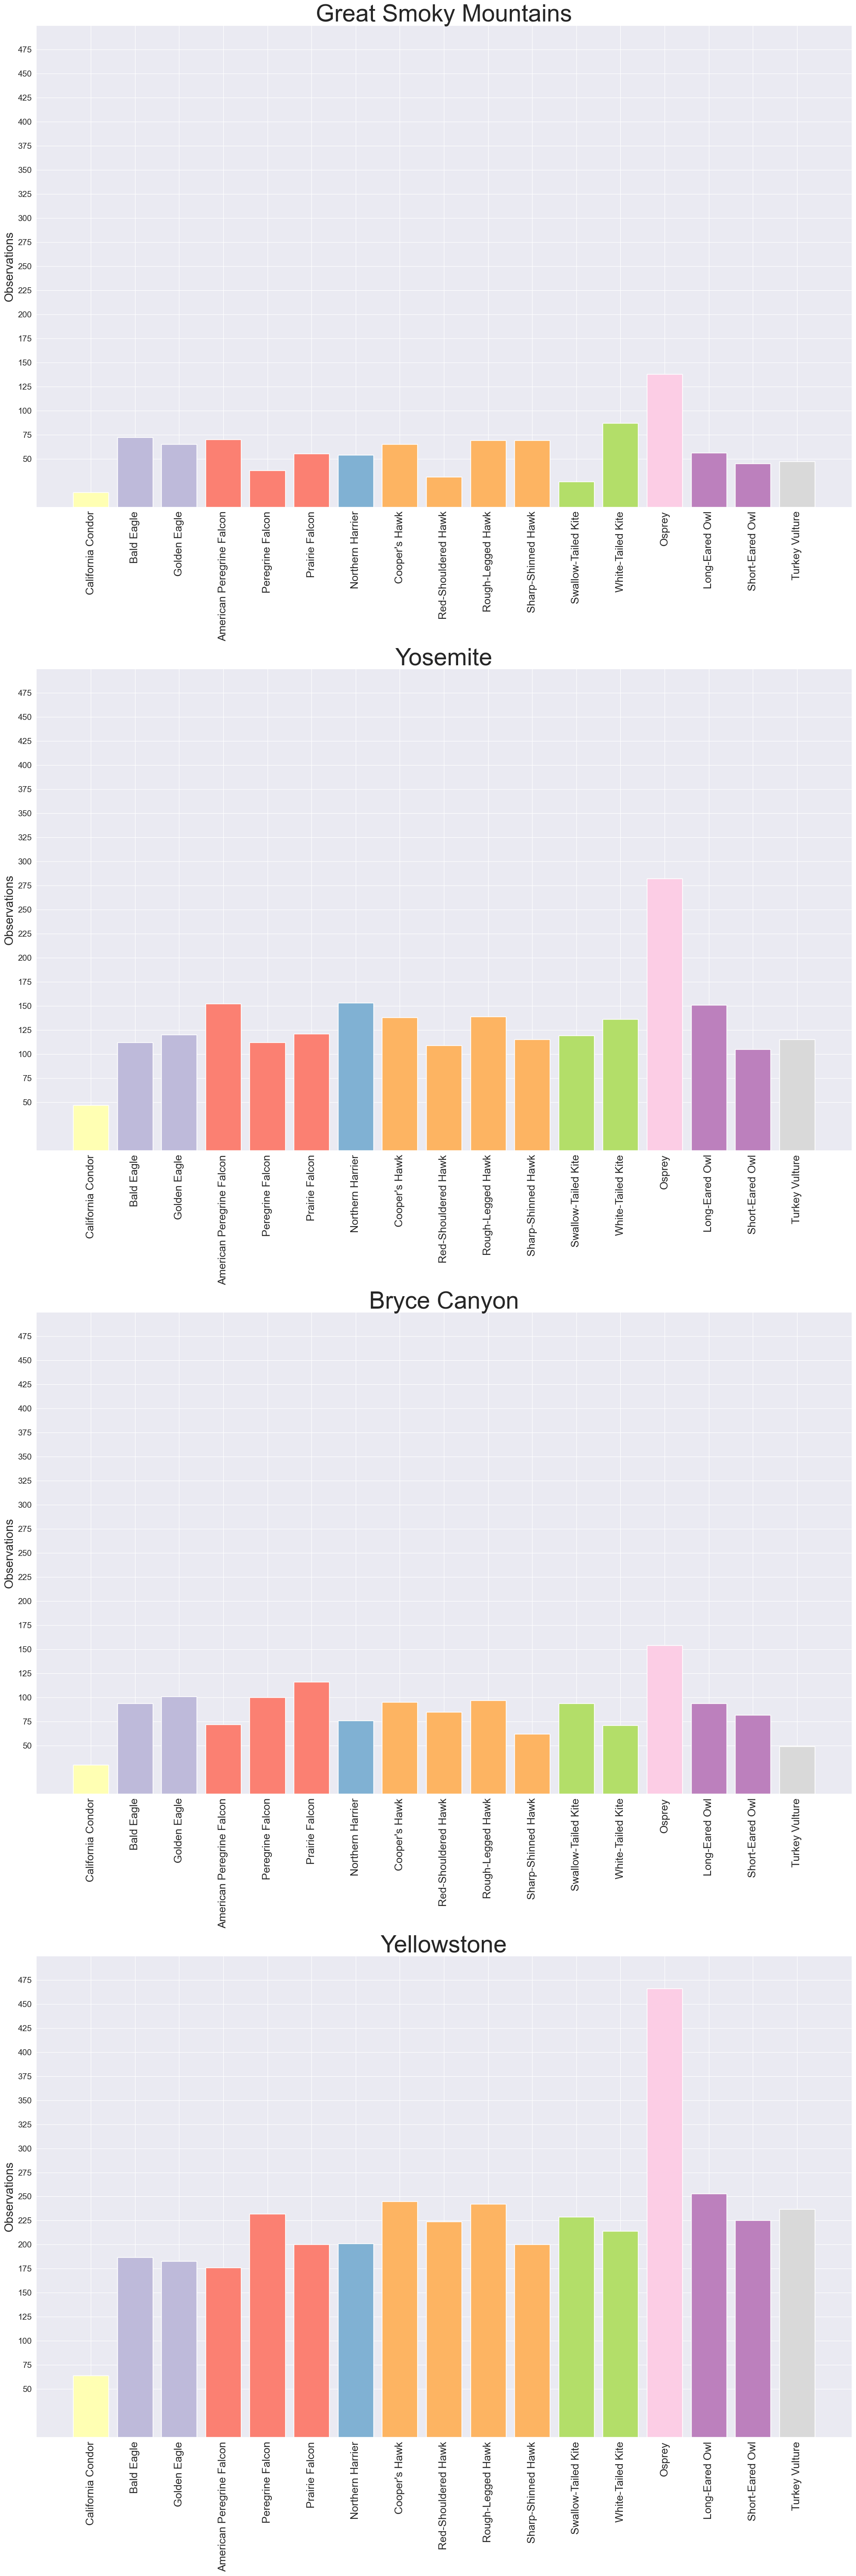

In [54]:
fig = plt.figure(figsize=(20,60))
for i in range(0,len(parks_list)):
    nat_park = parks_list[i]
    for park in parks_list:
        d[park] = pd.DataFrame(protected_birds_prey_obs_sorted[protected_birds_prey_obs_sorted['park_name'] == nat_park])
        ax = plt.subplot(4,1,(i+1))
        plt.bar(x=d[park].common_names, height=d[park].observations, color=c)
        plt.xticks(rotation=90, fontsize=18)
        plt.yticks(np.arange(50,500,25), fontsize=14)
        plt.title(nat_park, fontsize=40)
        plt.ylim(0,500)
        plt.grid(True)
        plt.ylabel("Observations", fontsize=20)
plt.tight_layout()
plt.show()

<img src="Images/colour_table.png"/>

### As we saw when we compared protected species across the board. There are no threatened bird species.

### `Osprey` is the most observed bird of prey across the National Parks. However, this category could fall into two groups;
#### `Osprey` & `Western Osprey`.

In [55]:
cons_status = d[parks_list[0]]['conservation_status'].unique().tolist()
print(cons_status)

['Endangered', 'In Recovery', 'Species of Concern']


I will populate three lists with the corresponding `common_names`

In [56]:
endangered = []
in_recovery = []
species_of_concern = []

data = d[parks_list[0]]

for index, row in data.iterrows():
    if row['conservation_status'] == 'Endangered':
        endangered.append(row['common_names'])
    elif row['conservation_status'] == 'In Recovery':
        in_recovery.append(row['common_names'])
    else:
        species_of_concern.append(row['common_names'])

In [57]:
print(f"There is {len(endangered)} endangered bird of prey species: \n\n{endangered}")

There is 1 endangered bird of prey species: 

['California Condor']


<img height="630" src="Images/California Condor.jpg" width="960"/>

[Pixabay](https://pixabay.com/photos/california-adult-an-portrait-bird-387357/)

### As we can see from the above visualisations, 'California Condor' is the least observed bird of prey in every National Park.
#### It is the only endangered bird of prey represented in the data set.
#### According to the [U.S. National Parks Service](https://www.nps.gov/articles/000/caco-world-2021.htm) the wild, free flying population total was $334$ birds as of 31/12/2019

In [58]:
print(f"There are {len(in_recovery)} bird of prey species in recovery: \n\n{in_recovery}")

There are 2 bird of prey species in recovery: 

['Bald Eagle', 'American Peregrine Falcon']


<img height="320" src="Images/Bald Eagle 2.jpg" width="960"/>

[Pixabay](https://pixabay.com/photos/eagle-raptor-birds-of-prey-bird-2776081/)

#### 'Bald Eagle' observations are not significantly different from 'Golden Eagle' observations

#### The remaining species are all `Species of Concern`

In [59]:
print(f"There are {len(species_of_concern)} bird of prey species of concern: \n\n{species_of_concern}")

There are 14 bird of prey species of concern: 

['Golden Eagle', 'Peregrine Falcon', 'Prairie Falcon', 'Northern Harrier', "Cooper's Hawk", 'Red-Shouldered Hawk', 'Rough-Legged Hawk', 'Sharp-Shinned Hawk', 'Swallow-Tailed Kite', 'White-Tailed Kite', 'Osprey', 'Long-Eared Owl', 'Short-Eared Owl', 'Turkey Vulture']


----
&nbsp;
### Total Number of bird of prey observations across the four National Parks

In [60]:
bird_prey_obs = protected_birds_prey_obs_sorted.groupby('park_name').observations.sum().reset_index()
print(bird_prey_obs)

               park_name  observations
0           Bryce Canyon          1472
1  Great Smoky Mountains          1002
2            Yellowstone          3778
3               Yosemite          2226


In [61]:
total = bird_prey_obs.observations.sum()
print(f"Total number of bird of prey observations: {total}")

Total number of bird of prey observations: 8478


In [62]:
print(f"Total number of observations, every category, every park: {obs_data.observations.sum()}")

Total number of observations, every category, every park: 3314739


# $\approx 0.26 \%$ of observations in `observations.csv` were of protected birds of prey

In [63]:
percentage_bird_prey = round((bird_prey_obs.observations.sum() / obs_data.observations.sum()) * 100, 2)
print(f"Of the observations across all National Parks, {percentage_bird_prey} % were bird of prey observations")

Of the observations across all National Parks, 0.26 % were bird of prey observations




----

&nbsp;
# Exploration of non-protected bird of prey species in the dataset where `conservation_status` $=$ `Least Concern`
&nbsp;

In [64]:
non_protected_birds = (species_data[(species_data.category == 'Bird')
                                & (species_data.conservation_status == 'Least Concern')])
print(f'\nThere are {non_protected_birds.shape} non-protected bird species\n')

non_protected_birds_prey = non_protected_birds[non_protected_birds['bird_of_prey'].map(lambda x: len(x)) > 0]
non_protected_birds_prey_list = non_protected_birds_prey.common_names.tolist()
print(f"We have {len(non_protected_birds_prey_list)} non-protected birds of prey with common names:"
      f"\n\n{non_protected_birds_prey_list}")
print(non_protected_birds_prey.shape)


There are (442, 6) non-protected bird species

We have 33 non-protected birds of prey with common names:

['Northern Goshawk', 'Red-Tailed Hawk', 'Broad-Winged Hawk', 'Mississippi Kite', 'Black Vulture', 'Common Nighthawk', 'Lesser Yellowlegs', 'Greater Yellowlegs', 'Eastern Meadowlark', 'Saw-Whet Owls', 'Northern Saw-Whet Owl', 'Great Horned Owl', 'Eastern Screech Owl, Eastern Screech-Owl', 'Eastern Screech-Owl', 'Barred Owl', 'Barn Owl, Common Barn-Owl', 'Barn-Owls', 'Ferruginous Hawk', "Swainson's Hawk", 'Western Meadowlark', 'Flammulated Owl', 'Boreal Owl', 'Burrowing Owl', 'Snowy Owl', 'Mountain Pygmy Owl, Northern Pygmy-Owl', 'Eastern Screech-Owl', 'Western Screech-Owl', 'Great Gray Owl, Great Grey Owl', 'Northern Pygmy Owl', 'Flammulated Owl', 'Great Gray Owl', 'Spotted Owl', 'Barn Owl']
(33, 6)


### By inspection we can see some false positives. `Meadowlark`, `Yellowlegs` etc

- If the `bird_of_prey` value is lower case, it will be removed from `non_protected_birds_prey`

- The [Common Nighthawk](https://en.wikipedia.org/wiki/Common_nighthawk) feeds on crepuscular (nocturnal), flying insects and is therefore not a bird of prey
&nbsp;
Also,
&nbsp;
- `Mountain Pygmy Owl, Northern Pygmy-Owl` will become `Mountain Pygmy Owl`
- `Barn Owl, Common Barn-Owl` will become `Common Barn-Owl`
- `Great Gray Owl, Great Grey Owl` will become `Great Gray Owl`
- `Eastern Screech Owl, Eastern Screech-Owl` will become `Screech Owl`
- Unnecessary pluralisation of `Saw-Whet Owls`
&nbsp;
- The above repetitions resulted in `Owl. Owl` being written to `bird_of_prey` which will also be removed


In [65]:
non_protected_birds_prey = non_protected_birds_prey[non_protected_birds_prey['bird_of_prey'].str.contains('^[A-Z]+')]

non_protected_birds_prey['common_names'].replace({'Mountain Pygmy Owl, Northern Pygmy-Owl':'Mountain Pygmy Owl',
                                                  'Barn Owl, Common Barn-Owl':'Common Barn Owl',
                                                  'Great Gray Owl, Great Grey Owl':'Great Gray Owl',
                                                  'Eastern Screech Owl, Eastern Screech-Owl':'Screech Owl',
                                                  'Barn-Owls':'Barn Owl',
                                                  'Saw-Whet Owls': 'Saw-Whet Owl'
                                                  },inplace=True)
non_protected_birds_prey['bird_of_prey'].replace({'Owl. Owl':'Owl'},inplace=True)

non_protected_birds_prey_list = non_protected_birds_prey.common_names.tolist()
print(f"We have {len(non_protected_birds_prey_list)} non-protected birds of prey with common names:"
      f"\n\n{non_protected_birds_prey_list}")
print(non_protected_birds_prey.shape)

We have 27 non-protected birds of prey with common names:

['Red-Tailed Hawk', 'Broad-Winged Hawk', 'Mississippi Kite', 'Black Vulture', 'Saw-Whet Owl', 'Northern Saw-Whet Owl', 'Great Horned Owl', 'Screech Owl', 'Eastern Screech-Owl', 'Barred Owl', 'Common Barn Owl', 'Barn Owl', 'Ferruginous Hawk', "Swainson's Hawk", 'Flammulated Owl', 'Boreal Owl', 'Burrowing Owl', 'Snowy Owl', 'Mountain Pygmy Owl', 'Eastern Screech-Owl', 'Western Screech-Owl', 'Great Gray Owl', 'Northern Pygmy Owl', 'Flammulated Owl', 'Great Gray Owl', 'Spotted Owl', 'Barn Owl']
(27, 6)


In [66]:
non_protected_birds_prey['is_barn_owl'] = non_protected_birds_prey.common_names.str.contains(r"\bBarn\b", regex=True)
non_protected_birds_prey[non_protected_birds_prey.is_barn_owl]

,category,scientific_name,common_names,conservation_status,is_protected,bird_of_prey,is_barn_owl
358,Bird,Tyto alba,Common Barn Owl,Least Concern,False,Owl,True
359,Bird,Tytonidae,Barn Owl,Least Concern,False,Owl,True
4575,Bird,Tyto alba,Barn Owl,Least Concern,False,Owl,True


### Before merging with `obs_data` we remove repeated reference to `Barn Owl` where index [358] and [4575] share all characteristics except `common_names`

In [67]:
non_protected_birds_prey.drop([4575], axis=0, inplace=True)
non_protected_birds_prey[non_protected_birds_prey.is_barn_owl]

,category,scientific_name,common_names,conservation_status,is_protected,bird_of_prey,is_barn_owl
358,Bird,Tyto alba,Common Barn Owl,Least Concern,False,Owl,True
359,Bird,Tytonidae,Barn Owl,Least Concern,False,Owl,True


----
&nbsp;
# Dataframe Merge

`non_protected_birds_prey` will be merged with `obs_data` to create a Dataframe `non_protected_birds_prey_obs` with observations of non-protected birds of prey across the four national parks

We will also clean the Dataframe of unnecessary columns

----

In [68]:
non_protected_birds_prey['not_protected'] = non_protected_birds_prey.conservation_status == 'Least Concern'
non_protected_birds_prey_obs = obs_data.merge(non_protected_birds_prey[non_protected_birds_prey.not_protected])
non_protected_birds_prey_obs.drop(columns=['category', 'conservation_status', 'is_protected', 'is_barn_owl', 'not_protected'], axis=1, inplace=True)
non_protected_birds_prey_obs.head()

,scientific_name,park_name,observations,common_names,bird_of_prey
0,Tytonidae,Bryce Canyon,111,Barn Owl,Owl
1,Tytonidae,Great Smoky Mountains,107,Barn Owl,Owl
2,Tytonidae,Yosemite,156,Barn Owl,Owl
3,Tytonidae,Yellowstone,238,Barn Owl,Owl
4,Coragyps atratus,Yosemite,150,Black Vulture,Vulture


In [69]:
non_protected_birds_prey_list = non_protected_birds_prey_obs.common_names.unique().tolist()
print(f"We have {len(non_protected_birds_prey_list)} non-protected birds of prey\
                \n\nWith Common Names:\n\n{non_protected_birds_prey_list}")

We have 23 non-protected birds of prey                

With Common Names:

['Barn Owl', 'Black Vulture', 'Common Barn Owl', 'Saw-Whet Owl', 'Mississippi Kite', 'Boreal Owl', 'Great Horned Owl', 'Ferruginous Hawk', 'Flammulated Owl', 'Mountain Pygmy Owl', 'Northern Pygmy Owl', 'Red-Tailed Hawk', 'Great Gray Owl', 'Eastern Screech-Owl', 'Western Screech-Owl', 'Screech Owl', 'Snowy Owl', "Swainson's Hawk", 'Northern Saw-Whet Owl', 'Broad-Winged Hawk', 'Spotted Owl', 'Barred Owl', 'Burrowing Owl']


----
&nbsp;
### We will plot visualisations of the distribution of non-protected bird of prey species in a similar way to the protected species

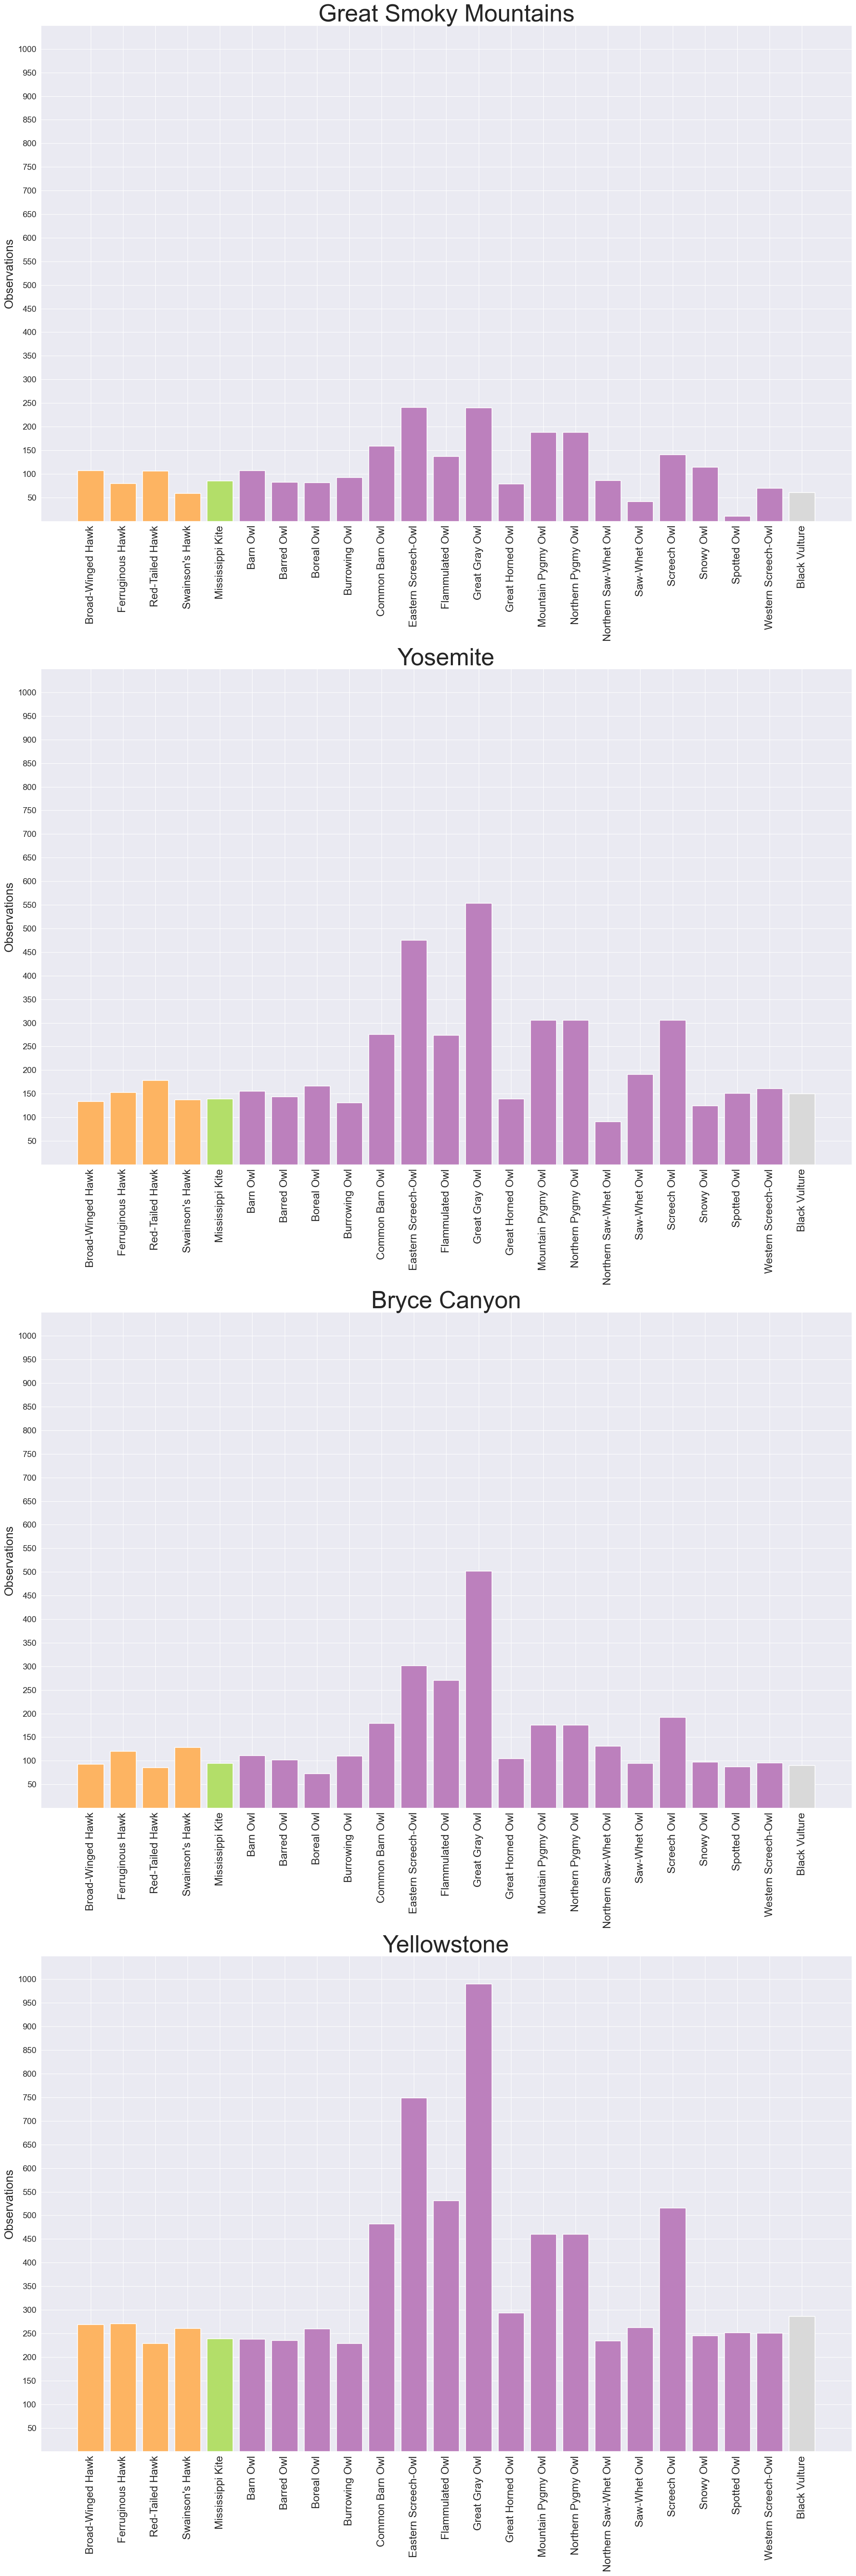

In [70]:
non_protected_birds_prey_obs_sorted = non_protected_birds_prey_obs.groupby(['park_name', 'bird_of_prey', 'common_names'])['observations'].sum().reset_index()

a = non_protected_birds_prey_obs_sorted['bird_of_prey'].apply(lambda x: prey_colour[x])

# Loop through the parks
e = {}
for park in parks_list:
    e[park] = pd.DataFrame(non_protected_birds_prey_obs_sorted[non_protected_birds_prey_obs_sorted['park_name'] == park].reset_index())
    # Create a new data frame for each park

fig = plt.figure(figsize=(20,60))
for i in range(0,len(parks_list)):
    nat_park = parks_list[i]
    for park in parks_list:
        e[park] = pd.DataFrame(non_protected_birds_prey_obs_sorted[non_protected_birds_prey_obs_sorted['park_name'] == nat_park])
        ax = plt.subplot(4,1,(i+1))
        plt.bar(x=e[park].common_names, height=e[park].observations, color=a)
        plt.xticks(rotation=90, fontsize=18)
        plt.yticks(np.arange(50,1050,50), fontsize=14)
        plt.title(nat_park, fontsize=40)
        plt.ylim(0,1050)
        plt.grid(True)
        plt.ylabel("Observations", fontsize=20)
plt.tight_layout()
plt.show()

<img src="Images/colour_table.png"/>

----

# The most frequently observed non-protected bird of prey was the Great Grey Owl.

<img height="620" src="Images/Great Grey Owl.jpg" width="960"/>

[Pixabay](https://pixabay.com/photos/great-grey-owl-bird-owl-animal-7180882/)

## Approximately three quarters of non-protected bird of prey observations were owls.

----
&nbsp;
### The total number of non-protected bird of prey observations across the four National Parks

In [71]:
np_bird_prey_obs = non_protected_birds_prey_obs_sorted.groupby('park_name').observations.sum().reset_index()
print(np_bird_prey_obs)

               park_name  observations
0           Bryce Canyon          3421
1  Great Smoky Mountains          2559
2            Yellowstone          8244
3               Yosemite          4844


In [72]:
total_np = np_bird_prey_obs.observations.sum()
print(f"Total number of non-protected bird of prey observations: {total_np}")

Total number of non-protected bird of prey observations: 19068


# $\approx 0.58 \%$ of observations in `observations.csv` were of non-protected birds of prey

In [73]:
percentage_bird_prey = round((total_np / obs_data.observations.sum()) * 100, 2)
print(f"Of the observations across all National Parks, {percentage_bird_prey} % were non-protected bird of prey observations")

Of the observations across all National Parks, 0.58 % were non-protected bird of prey observations


----
&nbsp;
# Conclusion.


----
## Observations of interest;
&nbsp;
#### Twice as many non-protected bird of prey observations were made in comparison to protected bird of prey.

#### Of all observations, $\approx 0.85 \%$ were birds of prey. One third of these observations were protected species

#### The California Condor is the only critically endangered bird of prey species in the dataset.

#### Of the birds of prey categorised `Least Concern`, there are 17 different species of owl.

#### Of the protected birds of prey the greatest aggregate was 4 different species of hawk.

#### The osprey was the most observed protected bird of prey. However, these observations could encapsulate two individual species; `Osprey` and `Western Osprey`

----

### [Owls](https://en.wikipedia.org/wiki/Owl) are mostly nocturnal. Their relative diversity could give an indication as to how human activities affect the populations of birds of prey.

----
## California Condors

The California Condor is critically endangered and during the 1980's the population dwindled to just a few dozen birds.
This was mainly due to;

- Destruction of the birds' native habitat, including old-growth forests and roosting sites.
- Lead poisoning from hunting activities.
- The widespread use of the pesticide [DDT](https://www.cdc.gov/biomonitoring/DDT_FactSheet.html) which causes eggshell thinning.
- Human activities such as direct killing and power line collisions

Conservation efforts, including captive breeding and release programs, have helped increase the population. However, the species is still at risk and considered one of the most endangered bird species in the world.

Below is a visualisation of Condor numbers in captivity and in the wild between 2000 and 2019. The data is from the [National Parks Service](https://www.nps.gov/subjects/condors/understandingcondors.htm)

In [ ]:
condors = pd.read_csv('condors.csv')
condors.head()

In [ ]:
# Plot the data as lines
plt.plot('year', 'wild', data=condors, label='Wild')
plt.plot('year', 'captive', data=condors, label='Captivity')
plt.xlabel('Year')
plt.xticks(range(2000, 2020, 5), range(2000, 2020, 5))
plt.ylabel('Number')
plt.title('Condor Numbers')
plt.legend()
plt.show()

### The number of wild, free flying condors has been steadily increasing since 2000.
However, this is still a very small population, primarily in California and Arizona. There are a few captive condors in Mexico.

In [ ]:
condor_df = protected_birds_prey_obs[protected_birds_prey_obs['common_names'] == 'California Condor']
condor_obs = condor_df.groupby(['park_name'])['observations'].sum()
print(condor_obs)

## There could not have been 15 weekly Condor observations in the Great Smoky Mountains!

----
The above analysis of Condor numbers shows the dataset of observations was fictional. This could also be seen in how normally distributed the observations were. The real world does not behave so conveniently.

It would be misguided to form any real world conclusions based on the insights of the above analysis.
However, I believe the analytical techniques I developed could easily be transferred to another dataset.

For example, this dataset from the [U.S. National Parks Service](https://www.kaggle.com/datasets/nationalparkservice/park-biodiversity?select=species.csv) on Kaggle

As an open-ended exploratory data analysis project, I'm happy with how I was able to organically form this exploration into North American birds of prey.

----
## Criticisms

- When isolating birds of prey from other birds in the dataset, I manually created a list of types of raptor. If my list is not exhaustive, there's a good chance I may miss birds of prey in large datasets.

- I chose to remove repeated `bird_of_prey` values, eg, `Kite. Kite` manually and could have easily writen a simple iteration to accomplish this task.

- For large datasets, I will need to create more efficient filtering algorithms.

- regex comparison with the `birds_of_prey` list should search for capitalisation.

----